# Data I/O



In [40]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Visualizations
import seaborn as sns

# Modeling
from sklearn.cluster import KMeans

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Enki/Alex_Intervalo51_100.csv', encoding='latin1', dtype={'Numero Telefono': str, 'Minutos Salientes':float}, thousands=",")

In [43]:
df.head()

,Mes,Region,Intervalo Llamadas Salientes,Rank Intervalo Llamadas Salientes,Numero Telefono,Total de Números,Llamadas Salientes,Minutos Salientes,Mensajes Salientes,Numeros Distintos Salientes,Llamadas Entrantes,Minutos Entrantes,Mensajes Entrantes,Promedio Minutos Entrantes,Minutos por Llamada Saliente,Recargas,Ubicaciones Distintas
0,JUNIO,1.0,51-100,6.0,6648154728,1.0,73.0,7398.0,0.0,1.0,141.0,8520.0,0.0,8520.0,101.35,NaN,NaN
1,JUNIO,1.0,51-100,6.0,6866015547,1.0,97.0,6528.0,0.0,2.0,43.0,3576.0,0.0,3576.0,67.30,NaN,NaN
2,JUNIO,1.0,51-100,6.0,6864249400,1.0,80.0,6387.0,4.0,1.0,53.0,4723.0,0.0,4723.0,79.84,NaN,NaN
3,JUNIO,1.0,51-100,6.0,6865783714,1.0,62.0,5234.0,6.0,5.0,48.0,3904.0,50.0,3904.0,84.42,NaN,NaN
4,JUNIO,1.0,51-100,6.0,6645501058,1.0,63.0,5006.0,0.0,6.0,9.0,277.0,0.0,277.0,79.46,NaN,NaN


In [44]:
df.shape

(64983, 17)

In [45]:
df.columns = [coln.replace(" ", "_").lower() for coln in df.columns.to_list()]
df.dropna(subset=['mes', 'numero_telefono'], inplace=True)

## Data Info

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64982 entries, 0 to 64981
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   mes                                64982 non-null  object 
 1   region                             64982 non-null  float64
 2   intervalo_llamadas_salientes       64982 non-null  object 
 3   rank_intervalo_llamadas_salientes  64982 non-null  float64
 4   numero_telefono                    64982 non-null  object 
 5   total_de_números                   64982 non-null  float64
 6   llamadas_salientes                 64982 non-null  float64
 7   minutos_salientes                  64982 non-null  float64
 8   mensajes_salientes                 64982 non-null  float64
 9   numeros_distintos_salientes        64982 non-null  float64
 10  llamadas_entrantes                 64982 non-null  float64
 11  minutos_entrantes                  64982 non-null  flo

## Data types and dropoffs


In [47]:
df[['numero_telefono']] = df[['numero_telefono']].astype(str)
df[['minutos_salientes']] = df[['minutos_salientes']].astype(np.float)
df.drop(columns=['region', 'intervalo_llamadas_salientes','rank_intervalo_llamadas_salientes', 'total_de_números', 'recargas', 'ubicaciones_distintas'], inplace=True)

In [48]:
# Describe Numerical
df.describe()

,llamadas_salientes,minutos_salientes,mensajes_salientes,numeros_distintos_salientes,llamadas_entrantes,minutos_entrantes,mensajes_entrantes,promedio_minutos_entrantes,minutos_por_llamada_saliente
count,64982.000000,64982.000000,64982.000000,64982.000000,64982.000000,64982.000000,64982.000000,64982.000000,64982.000000
mean,68.558124,189.960758,13.380967,9.922640,50.914022,146.539272,9.770506,146.539272,2.766021
std,13.544767,249.576984,85.533988,7.157547,36.621260,281.382096,75.936214,281.382096,3.523618
min,51.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.080000
25%,57.000000,73.000000,0.000000,5.000000,27.000000,42.000000,0.000000,42.000000,1.110000
50%,66.000000,117.000000,0.000000,8.000000,44.000000,79.000000,0.000000,79.000000,1.710000
75%,78.000000,207.000000,3.000000,12.000000,66.000000,151.000000,0.000000,151.000000,3.000000
max,100.000000,7398.000000,5331.000000,100.000000,1663.000000,12243.000000,5721.000000,12243.000000,101.350000


In [49]:
# Describe Numerical
df.select_dtypes(include=['object']).describe()

,mes,numero_telefono
count,64982,64982
unique,1,64982
top,JUNIO,6461483556
freq,64982,1


# Visuals

In [50]:
df

,mes,numero_telefono,llamadas_salientes,minutos_salientes,mensajes_salientes,numeros_distintos_salientes,llamadas_entrantes,minutos_entrantes,mensajes_entrantes,promedio_minutos_entrantes,minutos_por_llamada_saliente
0,JUNIO,6648154728,73.0,7398.0,0.0,1.0,141.0,8520.0,0.0,8520.0,101.35
1,JUNIO,6866015547,97.0,6528.0,0.0,2.0,43.0,3576.0,0.0,3576.0,67.30
2,JUNIO,6864249400,80.0,6387.0,4.0,1.0,53.0,4723.0,0.0,4723.0,79.84
3,JUNIO,6865783714,62.0,5234.0,6.0,5.0,48.0,3904.0,50.0,3904.0,84.42
4,JUNIO,6645501058,63.0,5006.0,0.0,6.0,9.0,277.0,0.0,277.0,79.46
...,...,...,...,...,...,...,...,...,...,...,...
64977,JUNIO,6861949889,63.0,6.0,0.0,2.0,7.0,7.0,0.0,7.0,0.10
64978,JUNIO,6863869295,62.0,6.0,13.0,3.0,39.0,35.0,0.0,35.0,0.10
64979,JUNIO,6641174976,65.0,6.0,0.0,5.0,10.0,13.0,0.0,13.0,0.09
64980,JUNIO,6863373081,57.0,6.0,0.0,2.0,34.0,9.0,0.0,9.0,0.10


In [93]:
sns.set_theme(style="ticks")

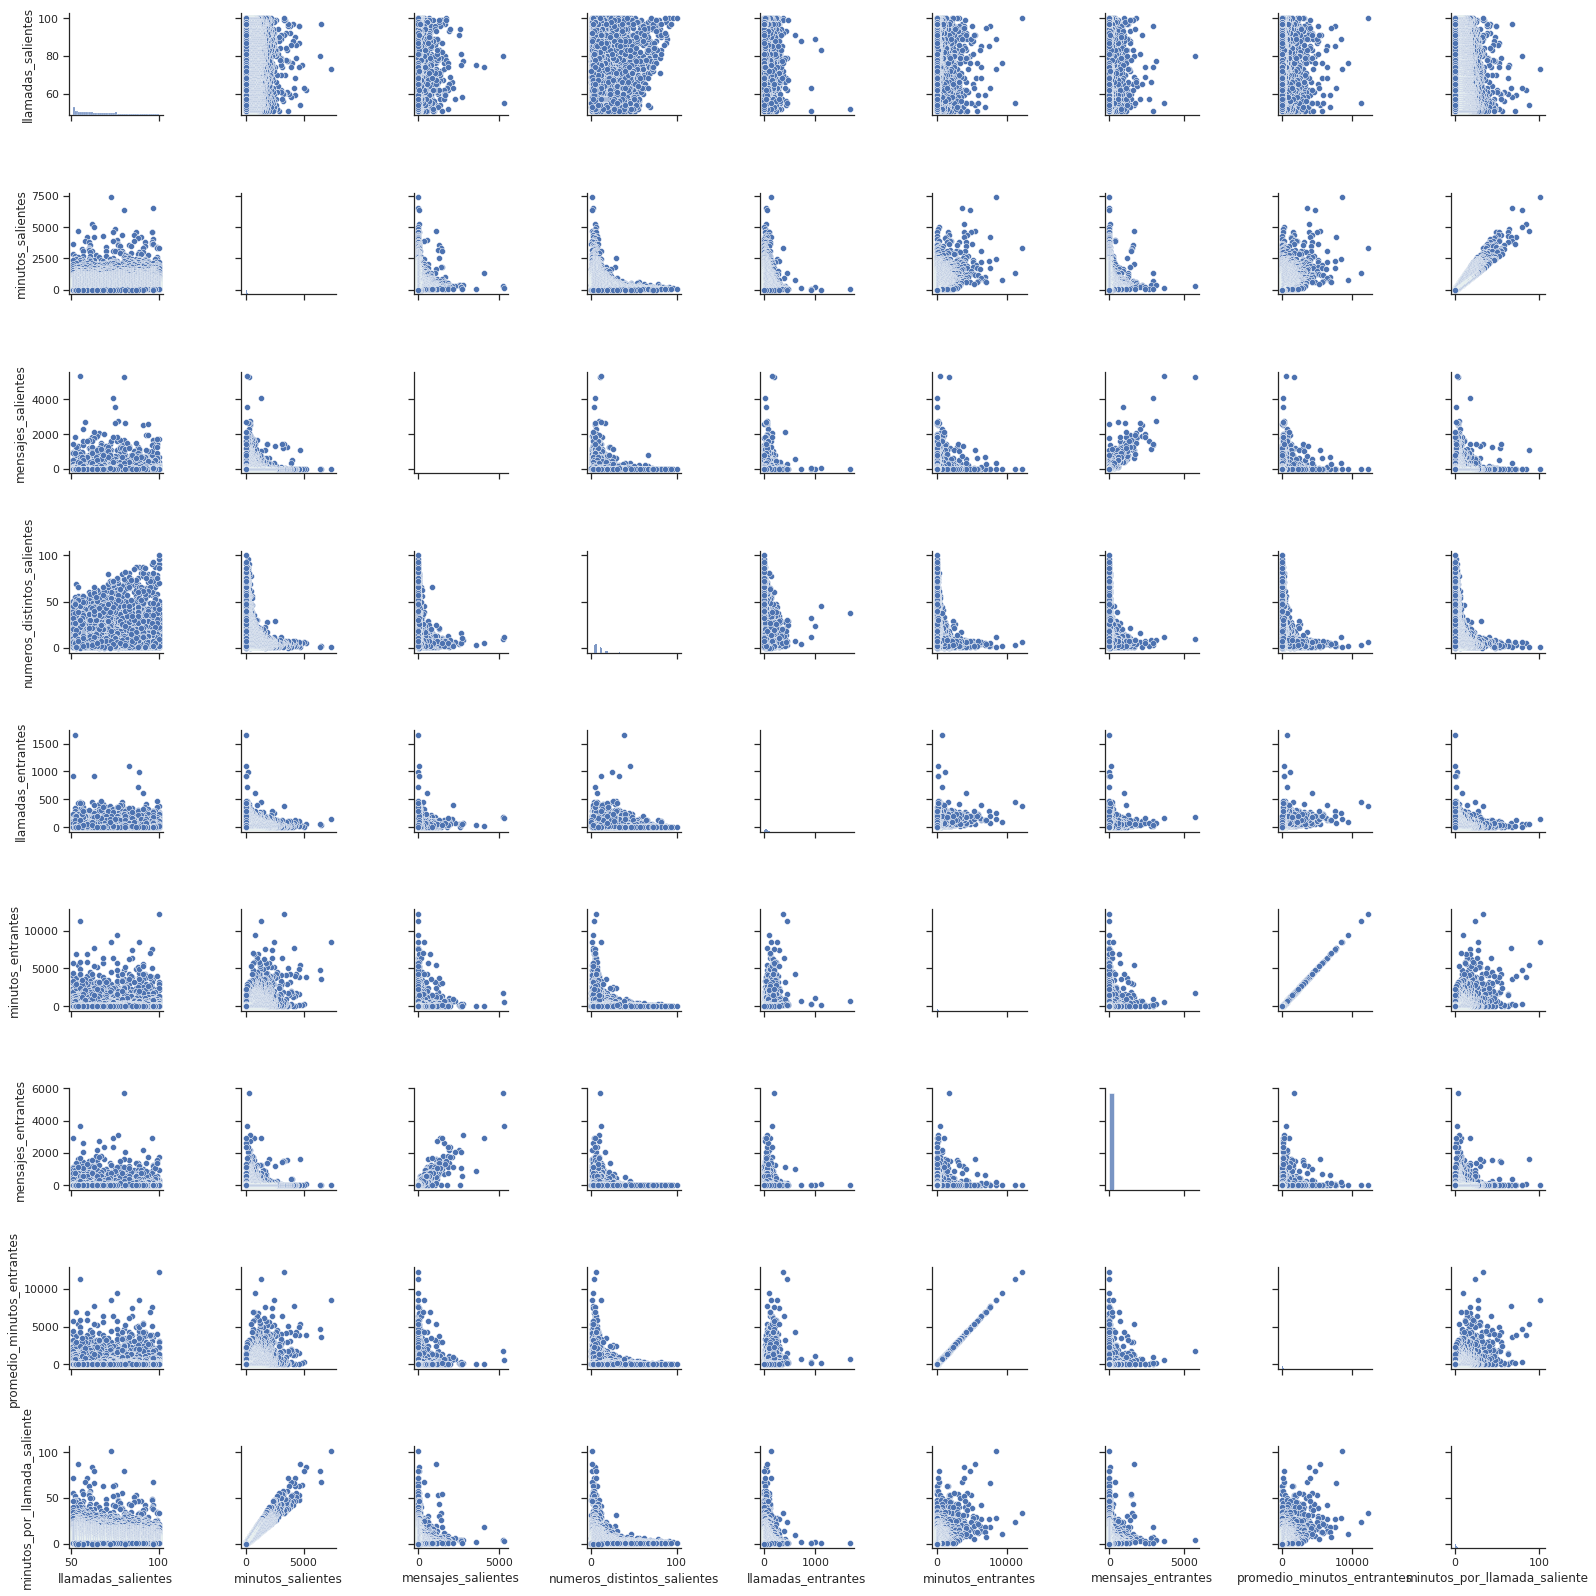

In [51]:
sns.set_theme(style="ticks")
sns.pairplot(df)

Llamadas Salientes - 50 bins

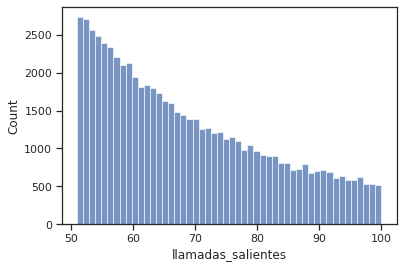

In [52]:
sns.histplot(df.llamadas_salientes, bins=50)

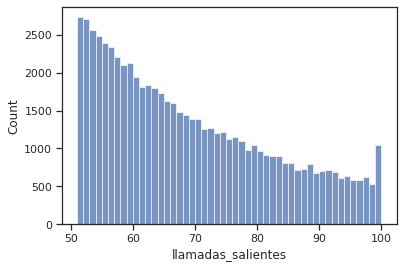

In [94]:
sns.histplot(df.llamadas_salientes, binwidth=1)

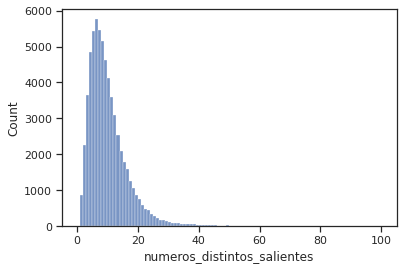

In [53]:
sns.histplot(df.numeros_distintos_salientes, binwidth=1)

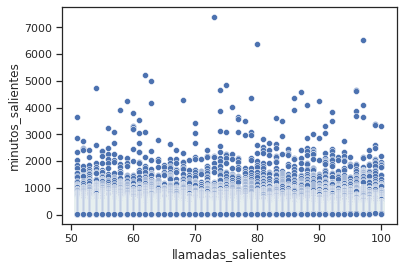

In [54]:
sns.scatterplot(data=df, x='llamadas_salientes', y ='minutos_salientes')

In [55]:
df.minutos_salientes

0        7398.0
1        6528.0
2        6387.0
3        5234.0
4        5006.0
          ...  
64977       6.0
64978       6.0
64979       6.0
64980       6.0
64981       4.0
Name: minutos_salientes, Length: 64982, dtype: float64

# Data Preparation

In [56]:
scaler = StandardScaler()

In [57]:
scaled = scaler.fit_transform(df[['numero_telefono', 'llamadas_salientes', 'minutos_salientes',
       'mensajes_salientes', 'numeros_distintos_salientes',
       'llamadas_entrantes', 'minutos_entrantes', 'mensajes_entrantes',
       'promedio_minutos_entrantes', 'minutos_por_llamada_saliente']])

In [58]:
dfScaled = pd.DataFrame(scaled, columns=df.drop('mes', axis=1).columns)
dfScaled

,numero_telefono,llamadas_salientes,minutos_salientes,mensajes_salientes,numeros_distintos_salientes,llamadas_entrantes,minutos_entrantes,mensajes_entrantes,promedio_minutos_entrantes,minutos_por_llamada_saliente
0,0.068810,0.327943,28.881248,-0.156442,-1.246615,2.459956,29.758557,-0.128668,29.758557,27.978274
1,1.315035,2.099859,25.395323,-0.156442,-1.106902,-0.216106,12.188008,-0.128668,12.188008,18.314836
2,1.304932,0.844752,24.830362,-0.109676,-1.246615,0.056961,16.264347,-0.128668,16.264347,21.873706
3,1.313709,-0.484185,20.210510,-0.086293,-0.687760,-0.079572,13.353691,0.529784,13.353691,23.173516
4,0.053630,-0.410355,19.296957,-0.156442,-0.548047,-1.144536,0.463646,-0.128668,0.463646,21.765861
...,...,...,...,...,...,...,...,...,...,...
64977,1.291778,-0.410355,-0.737096,-0.156442,-1.106902,-1.199149,-0.495911,-0.128668,-0.495911,-0.756620
64978,1.302758,-0.484185,-0.737096,-0.004454,-0.967188,-0.325333,-0.396401,-0.128668,-0.396401,-0.756620
64979,0.028884,-0.262696,-0.737096,-0.156442,-0.687760,-1.117229,-0.474587,-0.128668,-0.474587,-0.759459
64980,1.299920,-0.853334,-0.737096,-0.156442,-1.106902,-0.461867,-0.488803,-0.128668,-0.488803,-0.756620


In [59]:
ks= range(1,10)
inertias = []


In [60]:
for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(dfScaled)
  inertias.append(model.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


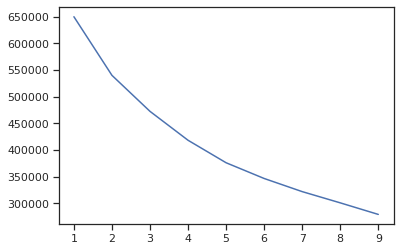

In [61]:
sns.lineplot(ks, inertias)

In [73]:
  model = KMeans(n_clusters=5)
  model.fit(dfScaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
df['labels'] = pd.DataFrame(model.labels_)

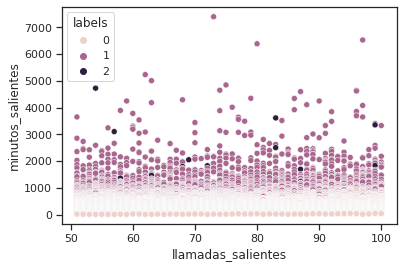

In [75]:
sns.scatterplot(data=df, x='llamadas_salientes', y ='minutos_salientes', hue='labels')

In [76]:
df

,mes,numero_telefono,llamadas_salientes,minutos_salientes,mensajes_salientes,numeros_distintos_salientes,llamadas_entrantes,minutos_entrantes,mensajes_entrantes,promedio_minutos_entrantes,minutos_por_llamada_saliente,labels
0,JUNIO,6648154728,73.0,7398.0,0.0,1.0,141.0,8520.0,0.0,8520.0,101.35,1
1,JUNIO,6866015547,97.0,6528.0,0.0,2.0,43.0,3576.0,0.0,3576.0,67.30,1
2,JUNIO,6864249400,80.0,6387.0,4.0,1.0,53.0,4723.0,0.0,4723.0,79.84,1
3,JUNIO,6865783714,62.0,5234.0,6.0,5.0,48.0,3904.0,50.0,3904.0,84.42,1
4,JUNIO,6645501058,63.0,5006.0,0.0,6.0,9.0,277.0,0.0,277.0,79.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64977,JUNIO,6861949889,63.0,6.0,0.0,2.0,7.0,7.0,0.0,7.0,0.10,0
64978,JUNIO,6863869295,62.0,6.0,13.0,3.0,39.0,35.0,0.0,35.0,0.10,0
64979,JUNIO,6641174976,65.0,6.0,0.0,5.0,10.0,13.0,0.0,13.0,0.09,0
64980,JUNIO,6863373081,57.0,6.0,0.0,2.0,34.0,9.0,0.0,9.0,0.10,0


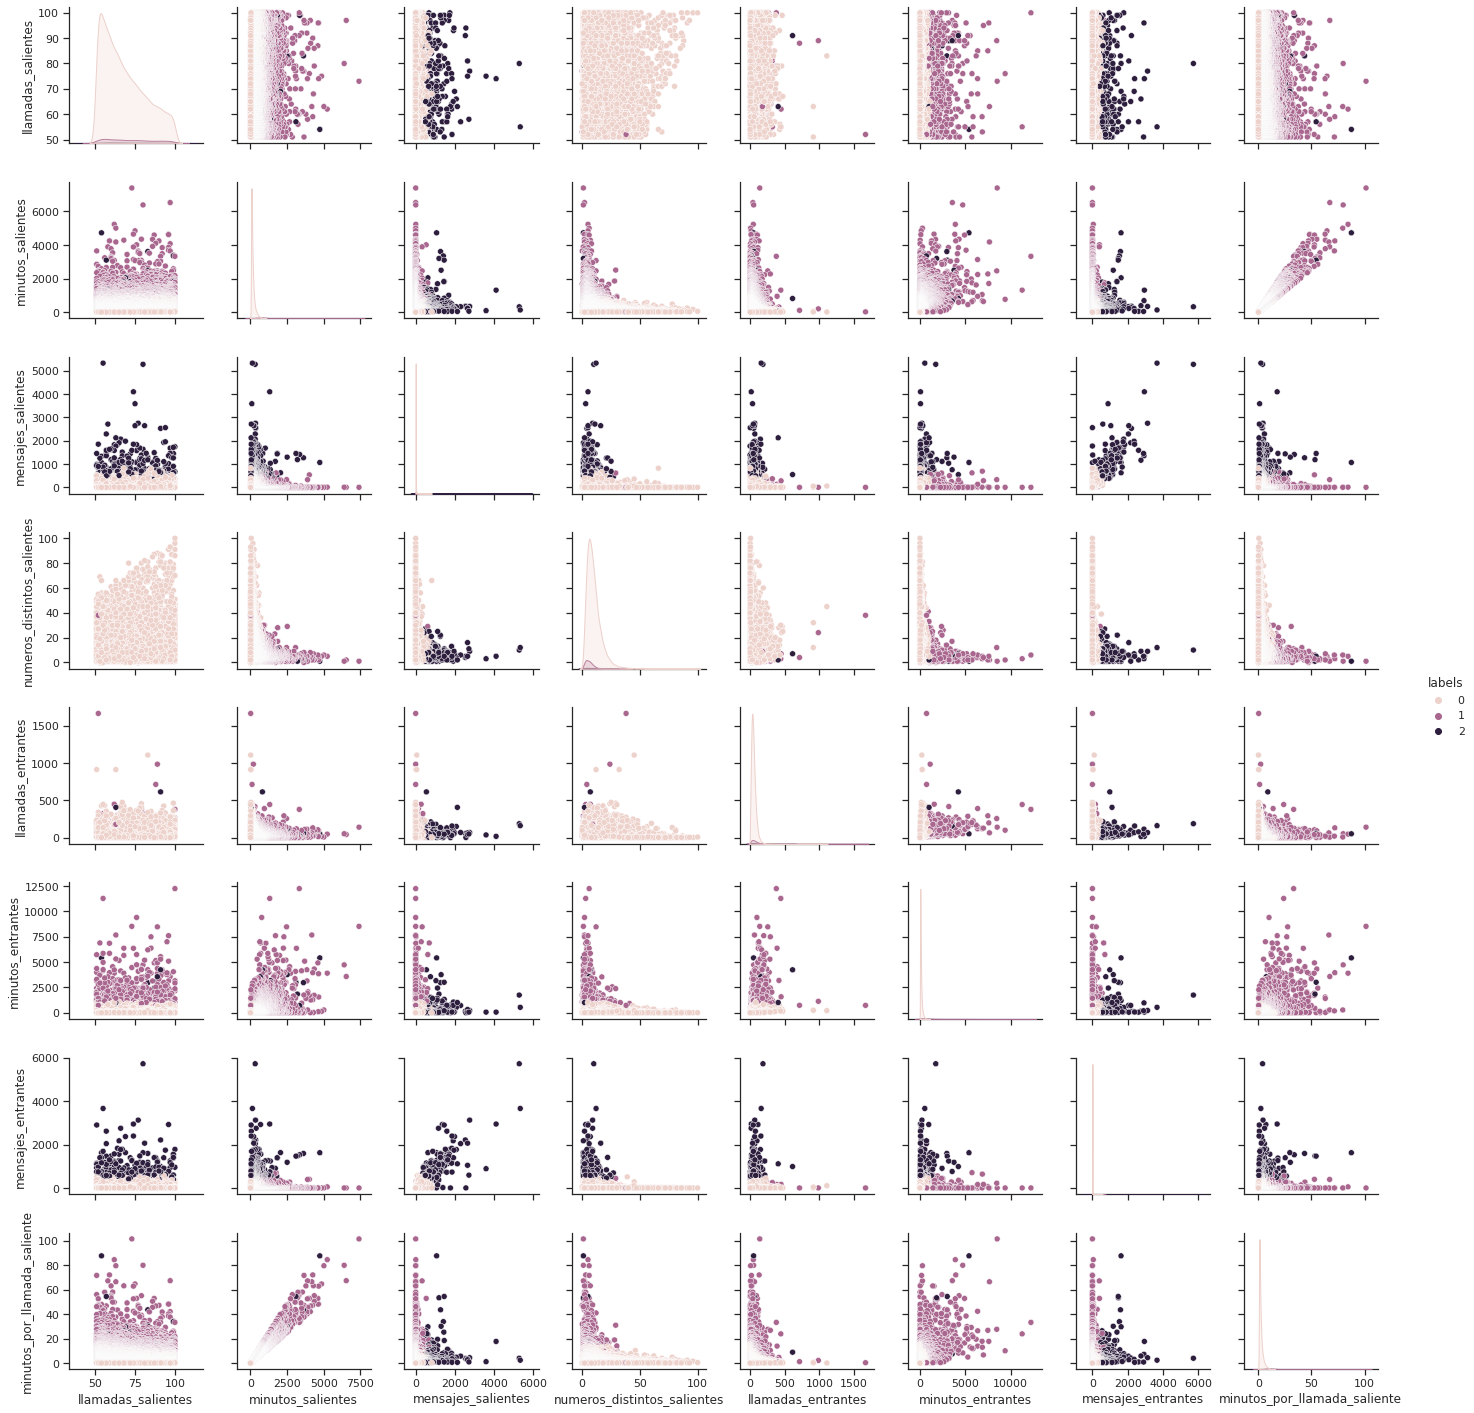

In [77]:
sns.set_palette("bright")
sns.pairplot(df[['llamadas_salientes', 'minutos_salientes',
       'mensajes_salientes', 'numeros_distintos_salientes',
       'llamadas_entrantes', 'minutos_entrantes', 'mensajes_entrantes',
       'minutos_por_llamada_saliente', 'labels']], hue='labels')

In [78]:
sns.color_palette()

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

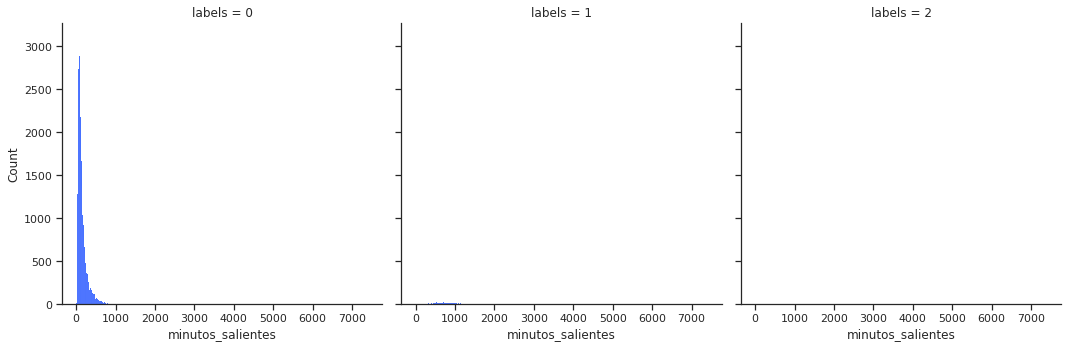

In [79]:
sns.displot(data=df, x="minutos_salientes", col="labels")

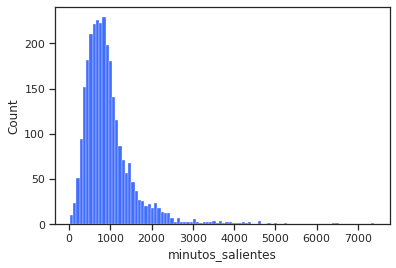

In [83]:
sns.histplot(data=df[df['labels']==1], x='minutos_salientes')

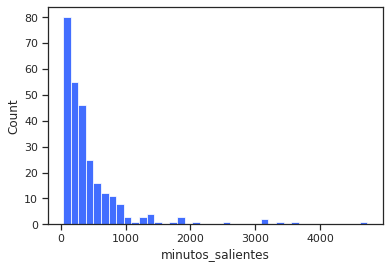

In [85]:
sns.histplot(data=df[df['labels']==2], x='minutos_salientes')

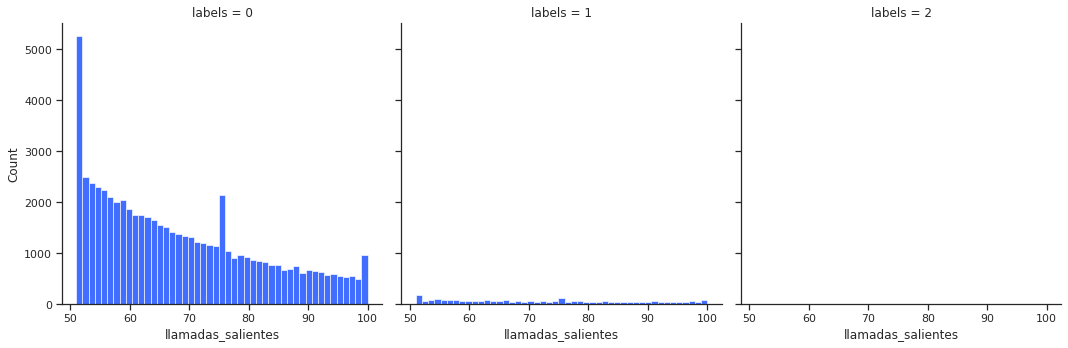

In [81]:
sns.displot(data=df, x="llamadas_salientes", col="labels")

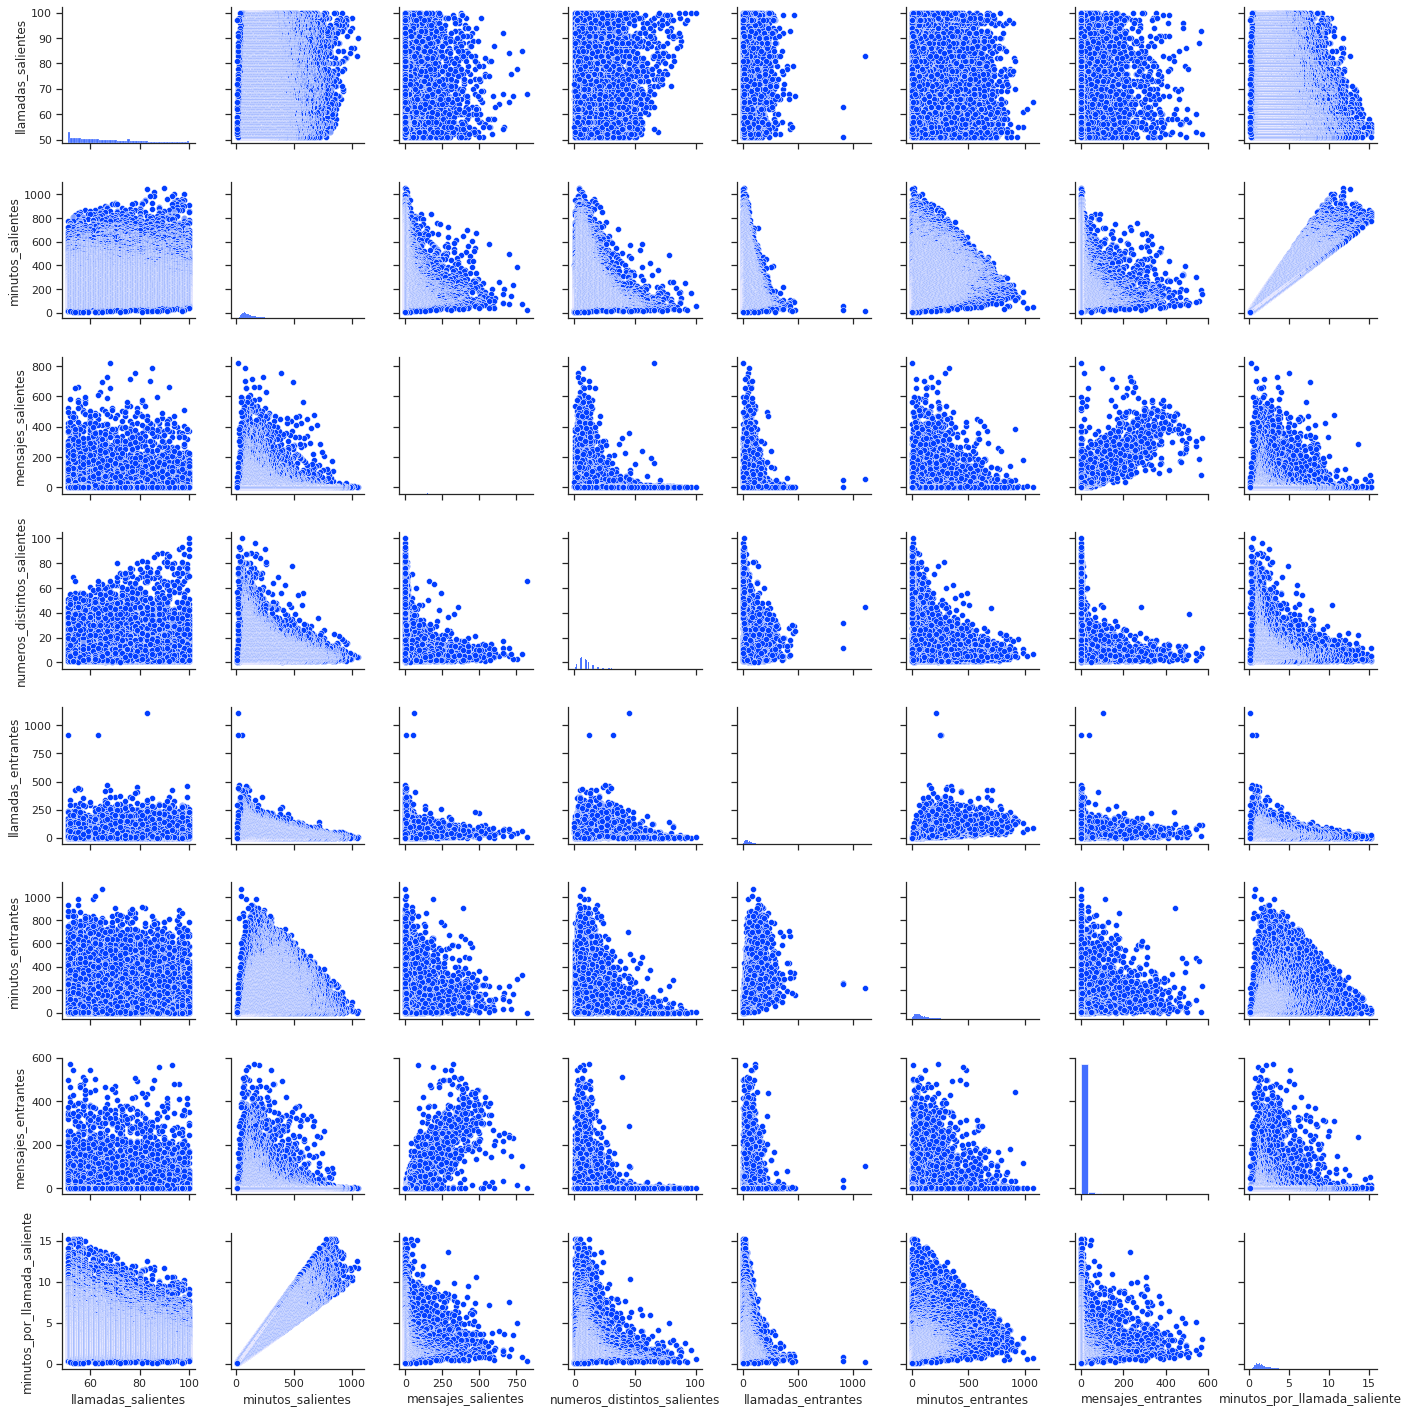

In [82]:
sns.set_palette("bright")
sns.pairplot(df.query('labels==0')[['llamadas_salientes', 'minutos_salientes',
       'mensajes_salientes', 'numeros_distintos_salientes',
       'llamadas_entrantes', 'minutos_entrantes', 'mensajes_entrantes',
       'minutos_por_llamada_saliente']])

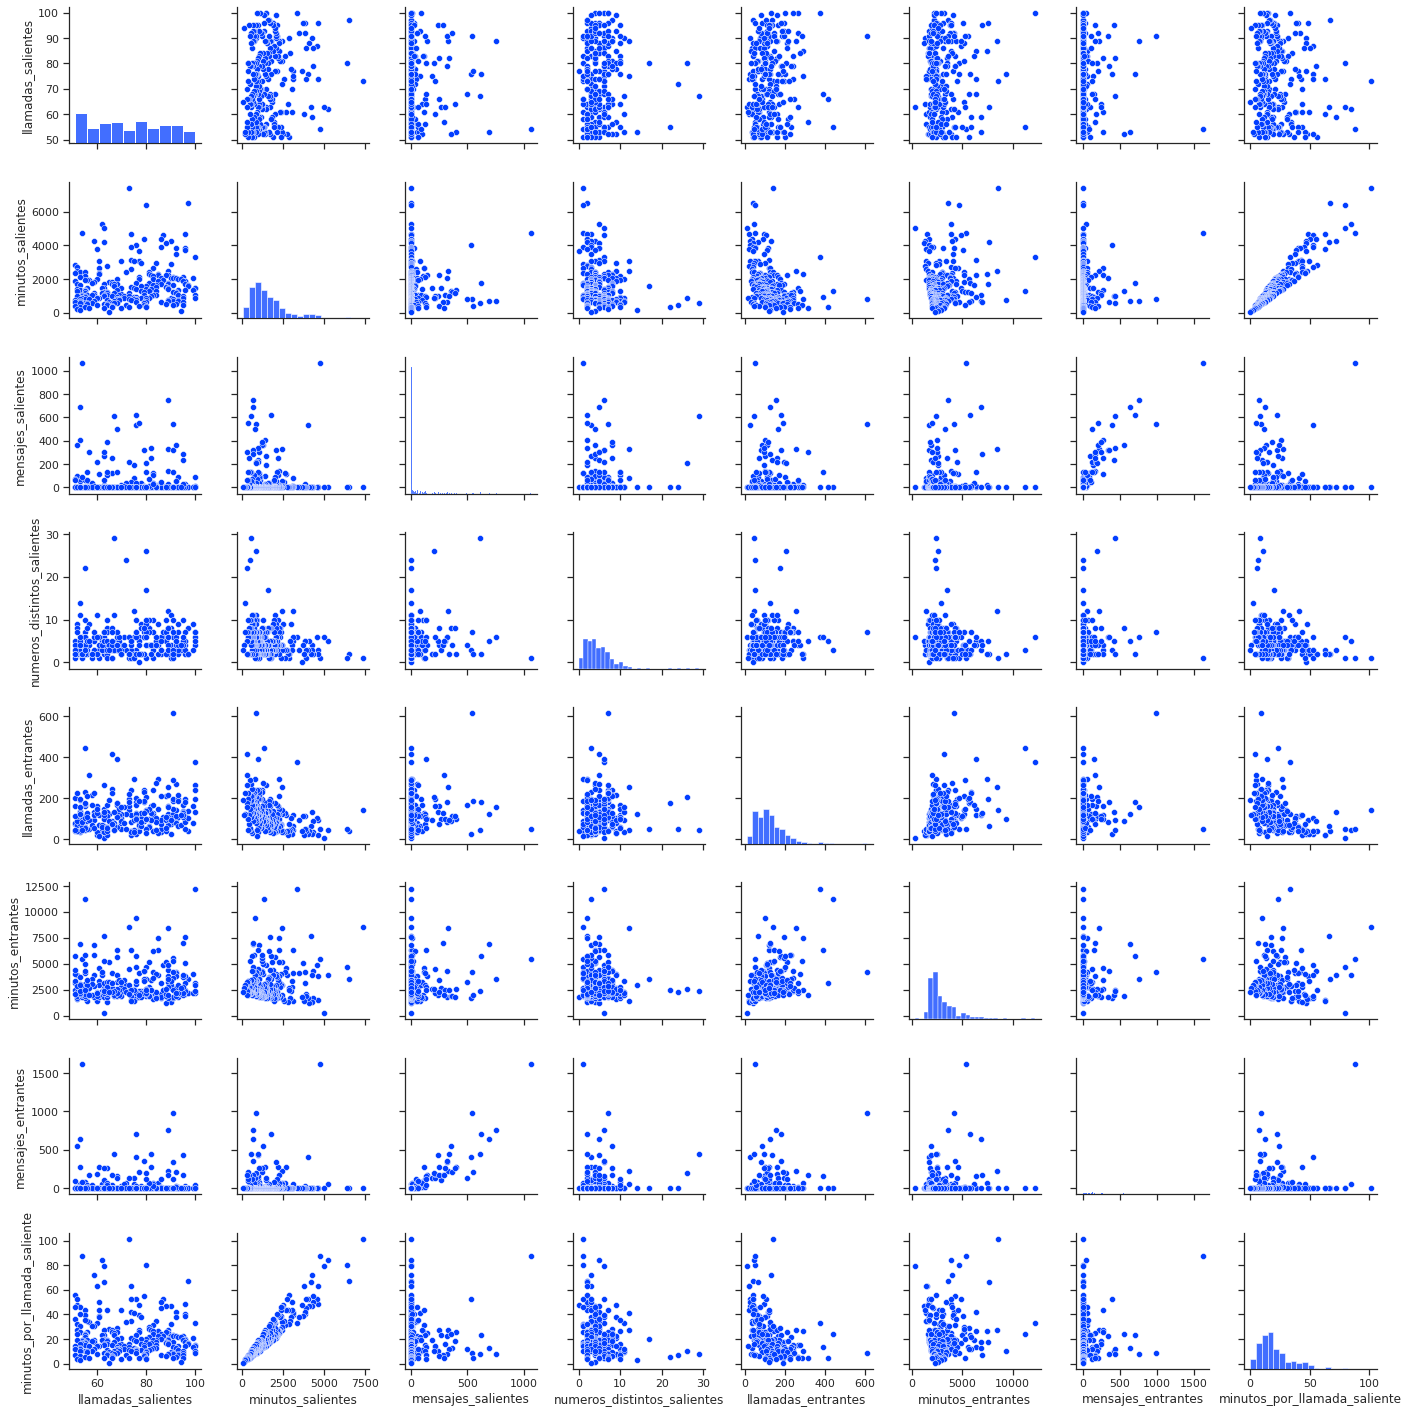

In [72]:
sns.pairplot(df.query('labels==2')[['llamadas_salientes', 'minutos_salientes',
       'mensajes_salientes', 'numeros_distintos_salientes',
       'llamadas_entrantes', 'minutos_entrantes', 'mensajes_entrantes',
       'minutos_por_llamada_saliente']])

In [88]:
df[df['labels']==0].describe()

,llamadas_salientes,minutos_salientes,mensajes_salientes,numeros_distintos_salientes,llamadas_entrantes,minutos_entrantes,mensajes_entrantes,promedio_minutos_entrantes,minutos_por_llamada_saliente,labels
count,61807.000000,61807.000000,61807.000000,61807.000000,61807.000000,61807.000000,61807.000000,61807.000000,61807.000000,61807.0
mean,68.374440,152.781594,8.608378,10.107075,49.945928,109.568851,5.526542,109.568851,2.246850,0.0
std,13.472233,125.166560,36.902081,7.229960,34.445064,108.719731,28.398230,108.719731,1.820673,0.0
min,51.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.080000,0.0
25%,57.000000,72.000000,0.000000,5.000000,27.000000,41.000000,0.000000,41.000000,1.090000,0.0
50%,65.000000,112.000000,0.000000,8.000000,43.000000,75.000000,0.000000,75.000000,1.640000,0.0
75%,78.000000,188.000000,2.000000,13.000000,65.000000,138.000000,0.000000,138.000000,2.730000,0.0
max,100.000000,1053.000000,820.000000,100.000000,1106.000000,1074.000000,572.000000,1074.000000,15.240000,0.0


In [90]:
df[df['labels']==1].describe()

,llamadas_salientes,minutos_salientes,mensajes_salientes,numeros_distintos_salientes,llamadas_entrantes,minutos_entrantes,mensajes_entrantes,promedio_minutos_entrantes,minutos_por_llamada_saliente,labels
count,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.0
mean,72.141773,958.265954,22.443601,6.317006,70.280097,908.490859,17.193515,908.490859,13.498531,1.0
std,14.467411,636.093505,70.112198,4.141963,63.628864,929.556070,60.753562,929.556070,8.846959,0.0
min,51.000000,20.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.380000,1.0
25%,59.000000,570.000000,0.000000,3.000000,31.000000,399.500000,0.000000,399.500000,8.140000,1.0
50%,70.000000,823.000000,0.000000,6.000000,58.000000,705.000000,0.000000,705.000000,11.580000,1.0
75%,84.000000,1135.000000,6.000000,8.000000,93.500000,1104.000000,1.000000,1104.000000,16.220000,1.0
max,100.000000,7398.000000,691.000000,41.000000,1663.000000,12243.000000,706.000000,12243.000000,101.350000,1.0


In [91]:
df[df['labels']==2].describe()

,llamadas_salientes,minutos_salientes,mensajes_salientes,numeros_distintos_salientes,llamadas_entrantes,minutos_entrantes,mensajes_entrantes,promedio_minutos_entrantes,minutos_por_llamada_saliente,labels
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.0
mean,72.050725,445.815217,986.956522,6.492754,64.293478,422.384058,882.188406,422.384058,6.298043,2.0
std,14.058746,578.242835,643.122614,4.475788,56.859675,665.355783,611.465662,665.355783,8.752583,0.0
min,51.000000,33.000000,362.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.490000,2.0
25%,60.000000,132.500000,621.750000,3.750000,32.000000,88.750000,545.750000,88.750000,1.965000,2.0
50%,69.000000,278.000000,784.500000,5.500000,52.000000,190.500000,721.500000,190.500000,3.810000,2.0
75%,83.000000,515.500000,1137.250000,8.000000,82.000000,482.000000,1061.000000,482.000000,7.117500,2.0
max,100.000000,4727.000000,5331.000000,27.000000,613.000000,5411.000000,5721.000000,5411.000000,87.540000,2.0


In [97]:
import matplotlib as plt

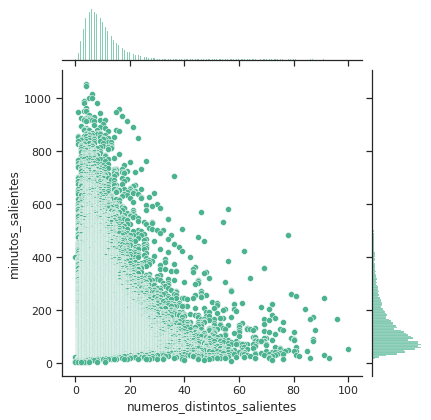

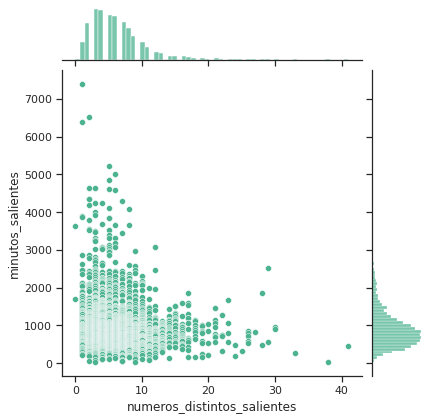

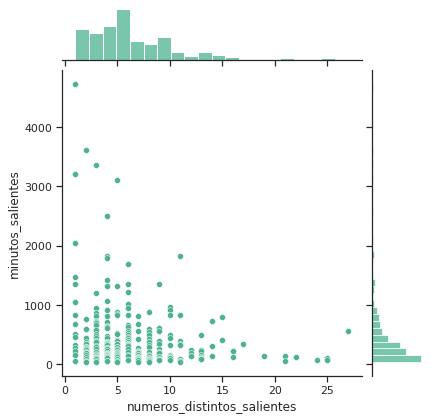

In [107]:
for i in range(0,3):
  print(sns.jointplot(data=df[df['labels']==i], y='minutos_salientes', x='numeros_distintos_salientes', kind="scatter", color="#4CB391"))

In [ ]:
plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)